# Project programming languages

### Project settings

In [1]:
PROJECT_NAME = 'simple'

### Imports

In [2]:
import os
import sys
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import git

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

sys.path.append(os.path.realpath(os.path.join(os.getcwd(), os.pardir, os.pardir)))
print(os.path.realpath(os.path.join(os.getcwd(), os.pardir, os.pardir)))

from gitlytic import settings
from gitlytic.dataloader import load_project_snapshot_df
from gitlytic.project import get_project_path

/home/skupsala/code/gitlytic


### Analysis

In [3]:
cloc_snapshot_df = load_project_snapshot_df(get_project_path(PROJECT_NAME), 'cloc')
cloc_snapshot_df.head()

Loading commits dataframe for simple


,Markdown,Python,SUM,commit_hash,JavaScript,Sass,Bourne Shell,HTML,author_date,CSS,repo_name
0,37.0,406.0,449.0,4f3900ede6836319d6c5a4c01a47826acf95e099,NaN,NaN,6.0,NaN,2018-04-14 11:41:59,NaN,gitlytic
1,37.0,214.0,257.0,79db938838f493476314e1ac0cafa8360622ee96,NaN,NaN,6.0,NaN,2018-01-07 16:55:43,NaN,gitlytic
2,37.0,220.0,263.0,6aaf9dc969f2656e92defa04110a883bd313929a,NaN,NaN,6.0,NaN,2017-12-30 20:21:24,NaN,gitlytic
3,37.0,358.0,401.0,6281f2ccf0840faea1beea6c4bb70596786e16e5,NaN,NaN,6.0,NaN,2018-03-10 19:51:01,NaN,gitlytic
4,NaN,159.0,165.0,8e42a93cd36649737b27406eb156944e4935ee10,NaN,NaN,6.0,NaN,2017-12-05 22:07:12,NaN,gitlytic


In [4]:
latest_snapshots_df = cloc_snapshot_df.loc[cloc_snapshot_df.groupby('repo_name').author_date.idxmax()]
latest_snapshots_df.head()

,Markdown,Python,SUM,commit_hash,JavaScript,Sass,Bourne Shell,HTML,author_date,CSS,repo_name
11,44.0,509.0,559.0,73d6b8cd390c504a9456c56baf64cce82cdc6095,NaN,NaN,6.0,NaN,2018-04-28 11:49:37,NaN,gitlytic
16,NaN,NaN,2732.0,8d9978d750a3e0dcd8b61a9d06e0eb643bba3288,14.0,1650.0,NaN,103.0,2018-01-06 12:06:56,965.0,skupsala.github.io


In [5]:
latest_sums = latest_snapshots_df.sum(numeric_only=True).drop(labels='SUM').sort_values(ascending=False)

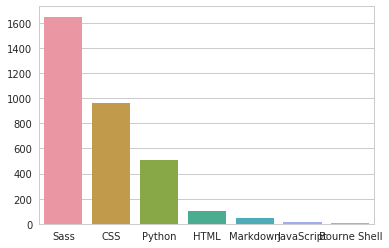

In [6]:
sns.set_style("whitegrid")
sns.barplot(x=latest_sums.index, y=latest_sums)